# Assignment 2

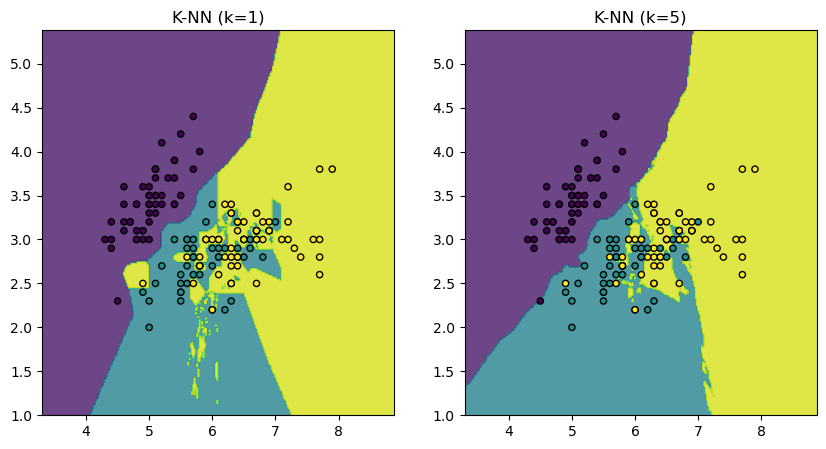

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only taking the first two features
y = iris.target

# Define the k-NN function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# Define the KNN classifier with k=1 and k=5
knn_1 = KNN(k=1)
knn_5 = KNN(k=5)

# Fit the classifiers
knn_1.fit(X, y)
knn_5.fit(X, y)

# Plot the decision boundaries
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(knn_1, X, y)
plt.title('K-NN (k=1)')

plt.subplot(1, 2, 2)
plot_decision_boundary(knn_5, X, y)
plt.title('K-NN (k=5)')

plt.show()
